In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# fish 데이터 불러오기
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


##### 1. 데이터 전처리  ######

In [8]:
# fish 의 Speciees 종류 확인

pd.unique(fish["Species"])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [30]:
# feature input 데이터 생성(2차원 배열로)

fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [31]:
# target 데이터 생성

fish_target = fish["Species"].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [32]:
# train, test 셋 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fish_input, fish_target, random_state=42)

In [38]:
# 표준정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

##### 2. KNN 분류기의 확률 예측 #####



In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, y_train)
print("train set의 정확도 : ", knn.score(train_scaled, y_train))
print("Test set의 정확도 : ", knn.score(test_scaled, y_test))

train set의 정확도 :  0.8907563025210085
Test set의 정확도 :  0.85


In [49]:
knn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [60]:
print("5개 예측 결과 : ", knn.predict(test_scaled[:5]))
print("5개 실제 결과 : ", y_test[:5])

5개 예측 결과 :  ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
5개 실제 결과 :  ['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [61]:
# 결과값 식에 넣어보기

proba = knn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [69]:
# 특정 샘플의 neightbors 종류

distances, indexes = knn.kneighbors(test_scaled[3:4]) 
# knn 의 kneighrbos 메서드 = 특정 샘플의 이웃과의 거리와 이웃의 index 출력 ( 위 코드에서는 4번째 샘플 선택)
y_train[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

##### 2. 로지스틱 회귀로 확률 예측 #####

Text(0, 0.5, 'phi')

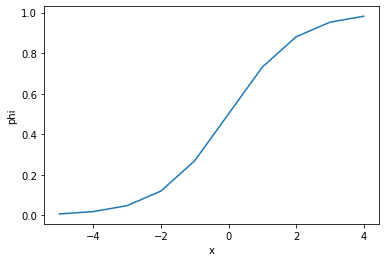

In [74]:
z = np.arange(-5,5,1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, sig)
plt.xlabel("x")
plt.ylabel("phi")

In [80]:
char_arr = np.array(["A","B","C","D","E"])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [96]:
# 종류가 "Bream" 이거나 "Smelt" 인 것만 고르기

bream_smelt_indexs =( y_train == "Bream") | (y_train == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexs]
target_bream_smelt = y_train[bream_smelt_indexs]

In [99]:
# 로지스틱 회귀 실행

from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()
logi.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [104]:
# 처음 5개 샘플 예측

print(logi.predict(train_bream_smelt[:5]))
print(target_bream_smelt[:5])

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [105]:
# 처음 5개 샘플 예측 확률

print(logi.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [107]:
# 양성(1), 음성(0) class 확인

print(logi.classes_)

['Bream' 'Smelt']


In [110]:
# z 값 계산하기

print(logi.decision_function(train_bream_smelt[:5]))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [112]:
# z값을 시그모이드 함수에 적용 (expit() 메서드 이용)

from scipy.special import expit

expit(logi.decision_function(train_bream_smelt[:5]))

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

##### 3. 로지스틱 회귀로 다중 분류 수행 #####

In [115]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20,max_iter=1000) # "C" : 모델 규제 파라미터, 높을수록 완화 / "max_iter" : 반복횟수 지정 파라미터
lr.fit(train_scaled, y_train)
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.9327731092436975
0.925


In [118]:
# 처음 5개 샘플에 대한 예측

print("5개 샘플 예측값 : ", lr.predict(test_scaled[:5]))
print("5개 샘플 실제값 : ", y_test[:5])

5개 샘플 예측값 :  ['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
5개 샘플 실제값 :  ['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [121]:
# 5개 샘플 예측 확률

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [122]:
# 클래스 정보
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [139]:
# z 값 구하여 소프트맥스 함수에 적용

decision = lr.predict_proba(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax

proba = softmax(decision, axis=0)
print(np.round(proba, decimals=3))

[[0.   0.01 0.84 0.   0.14 0.01 0.  ]
 [0.   0.   0.04 0.   0.01 0.95 0.  ]
 [0.   0.   0.03 0.93 0.02 0.02 0.  ]
 [0.01 0.03 0.31 0.01 0.57 0.   0.08]
 [0.   0.   0.9  0.   0.09 0.   0.  ]]
[[0.2   0.201 0.282 0.153 0.19  0.153 0.197]
 [0.2   0.198 0.127 0.153 0.167 0.39  0.197]
 [0.2   0.198 0.126 0.388 0.169 0.154 0.197]
 [0.202 0.205 0.165 0.154 0.293 0.151 0.212]
 [0.2   0.198 0.3   0.153 0.182 0.152 0.197]]
